In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
galton = pd.read_csv("data/Galtons Height Data.csv")
galton["MidParent"] = (galton.Father + galton.Mother)/2
galton["MidParentDeMean"] = galton["MidParent"] - galton["MidParent"].mean()
galton["FatherDeMean"] = galton["Father"] - galton["Father"].mean()
galton["MotherDeMean"] = galton["Mother"] - galton["Mother"].mean()
galton["HeightDeMean"] = galton["Height"] - galton["Height"].mean()
galton["HeightDeMeanDiff"] = galton.MidParentDeMean - galton.HeightDeMean
galton.head()

,Family,Father,Mother,Gender,Height,Kids,MidParent,MidParentDeMean,FatherDeMean,MotherDeMean,HeightDeMean,HeightDeMeanDiff
0,1,78.5,67.0,M,73.2,4,72.75,6.09137,9.267149,2.91559,6.43931,-0.34794
1,1,78.5,67.0,F,69.2,4,72.75,6.09137,9.267149,2.91559,2.43931,3.65206
2,1,78.5,67.0,F,69.0,4,72.75,6.09137,9.267149,2.91559,2.23931,3.85206
3,1,78.5,67.0,F,69.0,4,72.75,6.09137,9.267149,2.91559,2.23931,3.85206
4,2,75.5,66.5,M,73.5,4,71.00,4.34137,6.267149,2.41559,6.73931,-2.39794


In [3]:
galton.groupby(["Family", "Gender"]).mean()

Father  Mother     Height  Kids  MidParent  MidParentDeMean  \
Family Gender                                                                
1      F         78.5    67.0  69.066667   4.0      72.75          6.09137   
       M         78.5    67.0  73.200000   4.0      72.75          6.09137   
2      F         75.5    66.5  65.500000   4.0      71.00          4.34137   
       M         75.5    66.5  73.000000   4.0      71.00          4.34137   
3      F         75.0    64.0  68.000000   2.0      69.50          2.84137   
...               ...     ...        ...   ...        ...              ...   
203    M         62.0    66.0  64.000000   3.0      64.00         -2.65863   
204    F         62.5    63.0  57.000000   2.0      62.75         -3.90863   
       M         62.5    63.0  66.500000   2.0      62.75         -3.90863   
205    F         68.5    65.0  63.500000   8.0      66.75          0.09137   
       M         68.5    65.0  69.480000   8.0      66.75          0.09137   

               FatherDeMean  MotherDeMean  HeightDeMean  HeightDeMeanDiff  
Family Gender                                                              
1      F           9.267149       2.91559      2.305976          3.785393  
       M           9.267149       2.91559      6.439310         -0.347940  
2      F           6.267149       2.41559     -1.260690          5.602060  
       M           6.267149       2.41559      6.239310         -1.897940  
3      F           5.767149      -0.08441      1.239310          1.602060  
...                     ...           ...           ...               ...  
203    M          -7.232851       1.91559     -2.760690          0.102060  
204    F          -6.732851      -1.08441     -9.760690          5.852060  
       M          -6.732851      -1.08441     -0.260690         -3.647940  
205    F          -0.732851       0.91559     -3.260690          3.352060  
       M          -0.732851       0.91559      2.719310         -2.627940  

[341 rows x 10 columns]

(-11.910690423162587,
 13.389309576837414,
 -5.196130289532297,
 6.628869710467702)

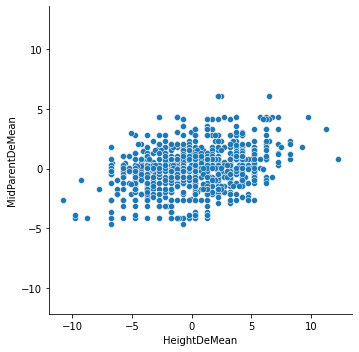

In [4]:
sns.relplot(data=galton, x="HeightDeMean", y="MidParentDeMean")
plt.axis('equal')

In [65]:
toplt = galton[["Father", "Mother", "Height"]].stack()
toplt.name = "Heights"
toplt.index.name = "Family"


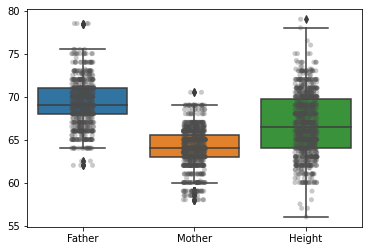

In [75]:
ax = sns.boxplot(x=toplt.index.get_level_values(1), y=toplt.values)
ax = sns.stripplot(x=toplt.index.get_level_values(1), y=toplt.values, color=".3", alpha=0.3)
xlims = ax.get_xlim()
ylims = ax.get_ylim()
# ax.set_xlim(xlims)
# ax.set_ylim(ylims)